# Network Size, Density, and Percolation

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

In [60]:
g = nx.karate_club_graph()
print(g.number_of_nodes())
g.number_of_edges()


34


78

In [62]:
g = nx.karate_club_graph()
m = g.number_of_edges()
n = g.number_of_nodes()
d = (2 *m)/(n * (n-1))
print(d)
nx.density(g)

0.13903743315508021


0.13903743315508021

## Network percolation
whether or not the nodes are sufficiently connected to each other so that they form a giant component that is visible at macroscopic
scales.

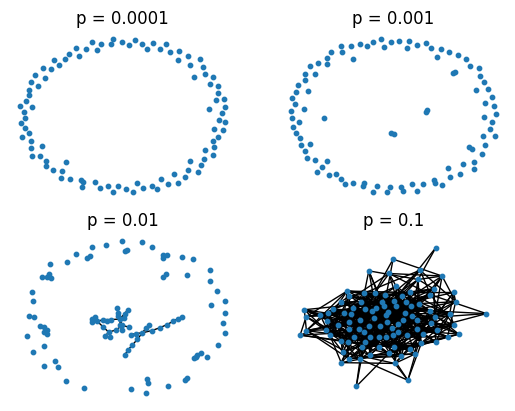

In [64]:
from pylab import *
import networkx as nx
for i, p in [(1, 0.0001), (2, 0.001), (3, 0.01), (4, 0.1)]:
    subplot(2, 2, i)
    title('p = ' + str(p))
    g = nx.erdos_renyi_graph(100, p)
    nx.draw(g, node_size = 10)
show()

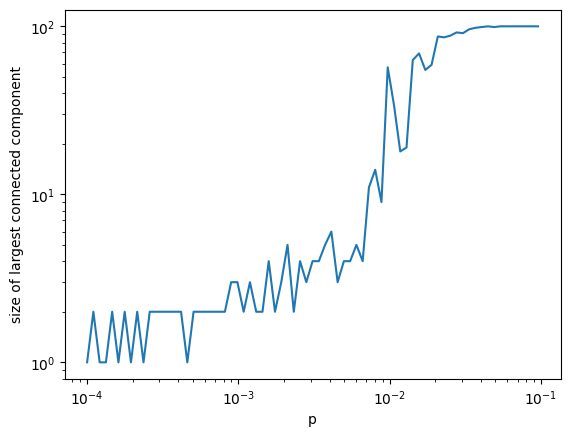

In [65]:
from pylab import *
import networkx as nx
p = 0.0001
pdata = []
gdata = []
while p < 0.1:
    pdata.append(p)
    g = nx.erdos_renyi_graph(100, p)
    ccs = nx.connected_components(g)
    gdata.append(max(len(cc) for cc in ccs))
    p *= 1.1
loglog(pdata, gdata)
xlabel('p')
ylabel('size of largest connected component')
show()


## Shortest path length

In [66]:
g = nx.karate_club_graph()
nx.shortest_path_length(g, 16, 25)

4

In [67]:
nx.shortest_path(g, 16, 25)

[16, 5, 0, 31, 25]

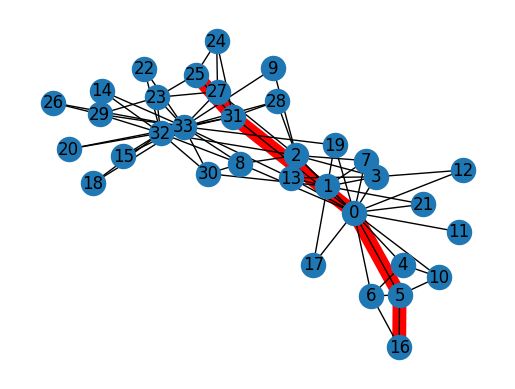

In [68]:
from pylab import *
import networkx as nx
g = nx.karate_club_graph()
positions = nx.spring_layout(g)
path = nx.shortest_path(g, 16, 25)
edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
nx.draw_networkx_edges(g, positions, edgelist = edges,
edge_color = 'r', width = 10)
nx.draw(g, positions, with_labels = True)
show()


## Characteristic path length, eccentricity, diameter, radius

In [69]:
import networkx as nx
g = nx.karate_club_graph()
print(nx.average_shortest_path_length(g),"\n",
nx.eccentricity(g),'\n',nx.diameter(g),'\n',
nx.periphery(g))


2.408199643493761 
 {0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4} 
 5 
 [14, 15, 16, 18, 20, 22, 23, 26, 29]


## Centralities and coreness

In [70]:
import networkx as nx
g = nx.karate_club_graph()
nx.degree_centrality(g)
nx.betweenness_centrality(g)
nx.closeness_centrality(g)
nx.eigenvector_centrality(g)
nx.pagerank(g)

{0: 0.08850807396280012,
 1: 0.057414840497110056,
 2: 0.06276686454603017,
 3: 0.03721208153631377,
 4: 0.020503977347501652,
 5: 0.03381044255357727,
 6: 0.03152901134345504,
 7: 0.026464618678806107,
 8: 0.03338155566846444,
 9: 0.009463219565799959,
 10: 0.020689016083505596,
 11: 0.009785686547904305,
 12: 0.011474872305945287,
 13: 0.033474187085322404,
 14: 0.012941600888556285,
 15: 0.01637633262359366,
 16: 0.016755401561857987,
 17: 0.009677265915396801,
 18: 0.009544864590131914,
 19: 0.013077518431081969,
 20: 0.011224235021037596,
 21: 0.01136015256356328,
 22: 0.01296059860686279,
 23: 0.04114596964602211,
 24: 0.01663437445025268,
 25: 0.028672962013730707,
 26: 0.015240392773380823,
 27: 0.027235358397633882,
 28: 0.01447852177427162,
 29: 0.028271813832825125,
 30: 0.02303184425091186,
 31: 0.04198548926127872,
 32: 0.07592643687005646,
 33: 0.09698041880501741}

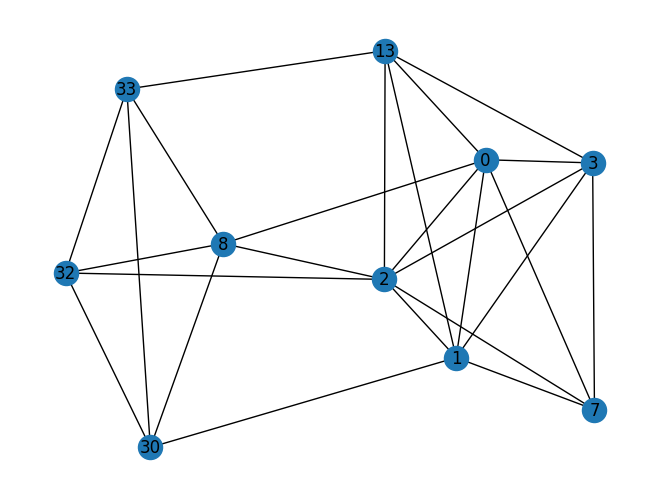

In [71]:
from pylab import *
import networkx as nx
g = nx.karate_club_graph()
nx.core_number(g)
nx.draw(nx.k_core(g), with_labels = True)
show()

## Clustering

In [74]:
import networkx as nx
g = nx.karate_club_graph()
print(nx.clustering(g))
print(nx.average_clustering(g))
nx.transitivity(g)

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}
0.5706384782076823


0.2556818181818182

## Small-world experiment

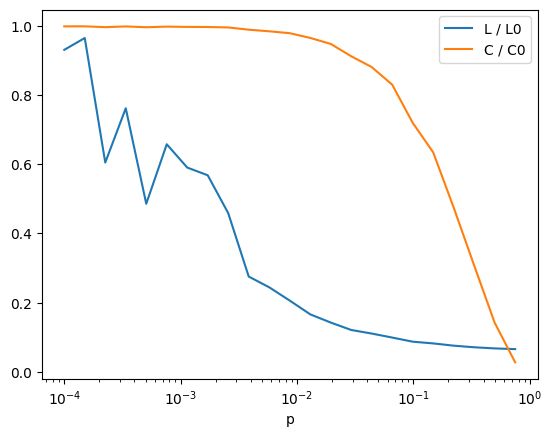

In [75]:
from pylab import *
import networkx as nx
pdata = []
Ldata = []
Cdata = []
g0 = nx.watts_strogatz_graph(1000, 10, 0)
L0 = nx.average_shortest_path_length(g0)
C0 = nx.average_clustering(g0)
p = 0.0001
while p < 1.0:
    g = nx.watts_strogatz_graph(1000, 10, p)
    pdata.append(p)
    Ldata.append(nx.average_shortest_path_length(g) / L0)
    Cdata.append(nx.average_clustering(g) / C0)
    p *= 1.5
semilogx(pdata, Ldata, label = 'L / L0')
semilogx(pdata, Cdata, label = 'C / C0')
xlabel('p')
legend()
show()


## Degree distribution

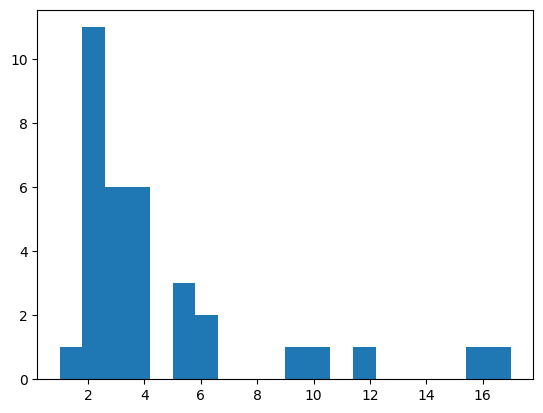

In [76]:
from pylab import *
import networkx as nx
g = nx.karate_club_graph()
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
hist(degree_sequence, bins = 20)
show()


In [77]:
nx.degree_histogram(g)

[0, 1, 11, 6, 6, 3, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]

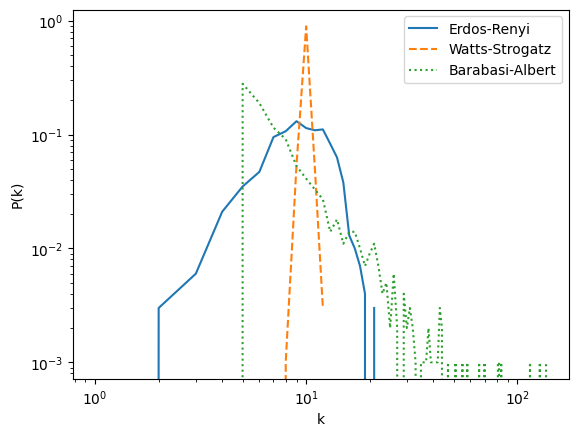

In [78]:
from pylab import *
import networkx as nx
n = 1000
er = nx.erdos_renyi_graph(n, 0.01)
ws = nx.watts_strogatz_graph(n, 10, 0.01)
ba = nx.barabasi_albert_graph(n, 5)
Pk = [float(x) / n for x in nx.degree_histogram(er)]
domain = range(len(Pk))
loglog(domain, Pk, '-', label = 'Erdos-Renyi')
Pk = [float(x) / n for x in nx.degree_histogram(ws)]
domain = range(len(Pk))
loglog(domain, Pk, '--', label = 'Watts-Strogatz')
Pk = [float(x) / n for x in nx.degree_histogram(ba)]
domain = range(len(Pk))
loglog(domain, Pk, ':', label = 'Barabasi-Albert')
xlabel('k')
ylabel('P(k)')
legend()
show()

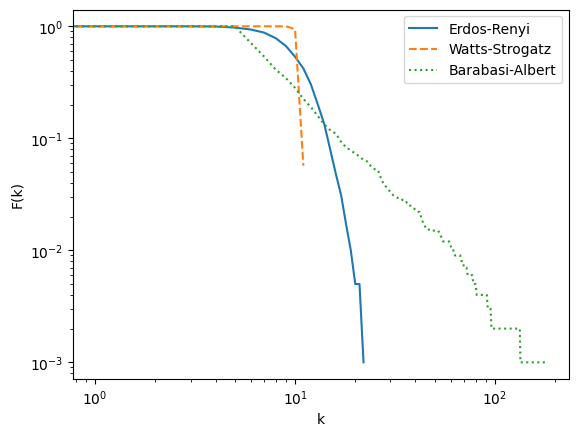

In [79]:
from pylab import *
import networkx as nx
n = 1000
er = nx.erdos_renyi_graph(n, 0.01)
ws = nx.watts_strogatz_graph(n, 10, 0.01)
ba = nx.barabasi_albert_graph(n, 5)
Pk = [float(x) / n for x in nx.degree_histogram(er)]
domain = range(len(Pk))
ccdf = [sum(Pk[k:]) for k in domain]
loglog(domain, ccdf, '-', label = 'Erdos-Renyi')
Pk = [float(x) / n for x in nx.degree_histogram(ws)]
domain = range(len(Pk))
ccdf = [sum(Pk[k:]) for k in domain]
loglog(domain, ccdf, '--', label = 'Watts-Strogatz')

Pk = [float(x) / n for x in nx.degree_histogram(ba)]
domain = range(len(Pk))
ccdf = [sum(Pk[k:]) for k in domain]
loglog(domain, ccdf, ':', label = 'Barabasi-Albert')
xlabel('k')
ylabel('F(k)')
legend()
show()


Estimated CCDF: F(k) = 24.02556596587396 * k^ -1.9351529186191994
r = -0.9964629816678082
p-value = 2.572123292307282e-136


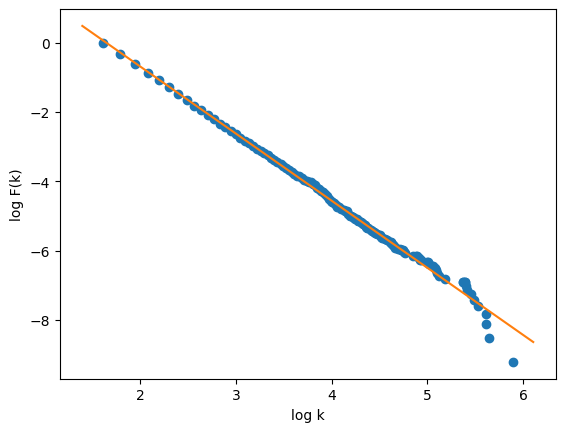

In [80]:
from pylab import *
import networkx as nx
from scipy import stats as st
n = 10000
ba = nx.barabasi_albert_graph(n, 5)
Pk = [float(x) / n for x in nx.degree_histogram(ba)]
domain = range(len(Pk))
ccdf = [sum(Pk[k:]) for k in domain]

logkdata = []
logFdata = []
prevF = ccdf[0]
for k in domain:
    F = ccdf[k]
    if F != prevF:
        logkdata.append(log(k))
        logFdata.append(log(F))
        prevF = F
a, b, r, p, err = st.linregress(logkdata, logFdata)
print ('Estimated CCDF: F(k) =', exp(b), '* k^', a)
print ('r =', r)
print ('p-value =', p)
plot(logkdata, logFdata, 'o')
kmin, kmax = xlim()
plot([kmin, kmax],[a * kmin + b, a * kmax + b])
xlabel('log k')
ylabel('log F(k)')
show()

## Assortativity

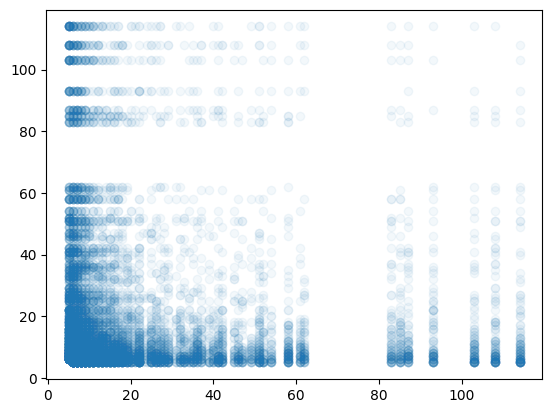

In [81]:
from pylab import *
import networkx as nx
n = 1000
ba = nx.barabasi_albert_graph(n, 5)
xdata = []
ydata = []
for i, j in ba.edges():
    xdata.append(ba.degree(i)); ydata.append(ba.degree(j))
    xdata.append(ba.degree(j)); ydata.append(ba.degree(i))
plot(xdata, ydata, 'o', alpha = 0.05)
show()


In [82]:
nx.degree_assortativity_coefficient(ba)

-0.061283687200012545

In [84]:

g = nx.DiGraph()
g.add_edges_from([(0,1), (0,2), (0,3), (1,2), (2,3), (3,0)])
print(nx.degree_assortativity_coefficient(g, x = 'in', y = 'in'))
print(nx.degree_assortativity_coefficient(g, x = 'in', y = 'out'))
print(nx.degree_assortativity_coefficient(g, x = 'out', y = 'in'))
nx.degree_assortativity_coefficient(g, x = 'out', y = 'out')


-0.250000000000001
0.6324555320336755
2.35513868802566e-16


-0.4472135954999579

## Community Structure and Modularity

In [85]:
from community import community_louvain as comm
g = nx.karate_club_graph()
bp = comm.best_partition(g)
bp
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 2, 9: 0, 10: 1,
11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 1, 17: 0, 18: 2, 19: 0,
20: 2, 21: 0, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3,
29: 2, 30: 2, 31: 3, 32: 2, 33: 2}
comm.modularity(bp, g)

0.44490358126721763

In [ ]:
pip install python-louvain

Plot of modularity vs community number